In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt

In [54]:
#Load files
lstm_fcn_path = 'Models/lstm_fcn_class/100/1min/lstm_fcn_class_hyperparameters_results.csv'
lstm_path = 'Models/lstm_class/100/5min/lstm_class_hyperparameters_results.csv'
tst_path = 'Models/tst_class/100/1min/tst_class_hyperparameters_results.csv'
mini_rocket_path = 'Models/mini_rocket_class/100/5min/mini_rocket_class_hyperparameters_results.csv'

In [53]:
lstm_fcn = pd.read_csv(lstm_fcn_path)
lstm_fcn.sort_values(by='val_accuracy', ascending=False).head(5)

,model,df_len,epochs,seq_length,batch_size,learning_rate,hidden_size,rnn_layers,rnn_dropout,fc_dropout,conv_layers,kss,val_accuracy,time
89,lstm_fcn_class,199961,20,30,16,0.0001,100,1,0.0,0.0,"[256, 512, 256]","[5, 3, 3]",0.71,894.312546
97,lstm_fcn_class,199961,20,30,16,0.0001,100,2,0.6,0.0,"[256, 512, 256]","[5, 3, 3]",0.70,991.546671
26,lstm_fcn_class,199961,20,30,16,0.0001,100,1,0.0,0.4,"[256, 512, 256]","[5, 3, 3]",0.67,1618.587554
30,lstm_fcn_class,199961,20,20,16,0.0001,100,1,0.0,0.4,"[128, 256, 128]","[5, 3, 3]",0.66,491.923778
40,lstm_fcn_class,199961,20,30,16,0.0001,200,1,0.0,0.0,"[256, 512, 256]","[5, 3, 3]",0.66,939.328829


In [52]:
def get_results(df, groupby_col):
    agg_results = df.groupby(groupby_col).agg({'val_accuracy': ['mean', 'max', 'min', 'count']}).reset_index()
    agg_results.columns = [groupby_col, 'Mean', 'High', 'Low', 'Count']
    agg_results = agg_results.sort_values(by='Mean', ascending=False)
    return agg_results

#Variant av de du gjort tidigare!
def print_results(df, groupby_cols):
    results = {col: get_results(df, col) for col in groupby_cols}

    for col in groupby_cols:
        print(f"Results for {col}:")
        print(results[col])

In [55]:
print('LSTM FCN classification')
print_results(lstm_fcn,['seq_length','batch_size','learning_rate','hidden_size','rnn_layers','rnn_dropout','fc_dropout','conv_layers','kss'])

LSTM FCN classification
Results for seq_length:
   seq_length      Mean  High   Low  Count
0           5  0.540000  0.63  0.45     30
4          40  0.523529  0.62  0.44     17
3          30  0.521786  0.71  0.33     28
5          50  0.511667  0.60  0.45      6
2          20  0.507500  0.66  0.34     12
1          10  0.507143  0.56  0.35      7
Results for batch_size:
   batch_size      Mean  High   Low  Count
2          64  0.545000  0.63  0.45     32
3         128  0.529231  0.61  0.37     13
1          32  0.513333  0.61  0.44      9
0          16  0.510435  0.71  0.33     46
Results for learning_rate:
   learning_rate      Mean  High   Low  Count
0       0.000001  0.539091  0.62  0.41     11
1       0.000010  0.531429  0.63  0.34     21
2       0.000100  0.520200  0.71  0.33     50
4       0.010000  0.518571  0.57  0.45      7
3       0.001000  0.517273  0.61  0.45     11
Results for hidden_size:
   hidden_size      Mean  High   Low  Count
2          100  0.539552  0.71  0.34    

In [56]:
lstm_fcn_best = lstm_fcn[(lstm_fcn['seq_length']==5)&
                           (lstm_fcn['batch_size']==64)&
                           (lstm_fcn['learning_rate']==0.00001)&
                           (lstm_fcn['hidden_size']==100)&
                           (lstm_fcn['rnn_layers']==2)&
                           (lstm_fcn['rnn_dropout']==0.2)&
                           (lstm_fcn['fc_dropout']==0.4)&
                           (lstm_fcn['conv_layers']=='[256, 512, 256]')&
                           (lstm_fcn['kss']=='[7, 7, 5]')]

print('LSTM_FNC best-classification')
#Hahaha den körde aldrig bästa kombon, så tog den som den konvergera till mest ggr
print_results(lstm_fcn_best,['model'])

LSTM_FNC best-classification
Results for model:
            model     Mean  High   Low  Count
0  lstm_fcn_class  0.56125  0.63  0.49      8


In [50]:
# group the DataFrame by the chosen columns and count the number of rows in each group
lstm_fcn = lstm_fcn.groupby(['seq_length', 'batch_size', 'learning_rate', 'hidden_size', 'rnn_layers', 'rnn_dropout', 'fc_dropout','conv_layers','kss']).size().reset_index(name='count')
lstm_fcn_grouped_sorted = lstm_fcn.sort_values(by='count', ascending=False)
lstm_fcn_grouped_sorted

,seq_length,batch_size,learning_rate,hidden_size,rnn_layers,rnn_dropout,fc_dropout,conv_layers,kss,count
0,5,16,0.000001,100,2,0.0,0.6,"[256, 512, 256]","[7, 5, 3]",1
37,30,16,0.000100,50,2,0.2,0.4,"[128, 256, 128]","[3, 3, 3]",1
53,40,16,0.000100,100,1,0.4,0.0,"[64, 128, 64]","[5, 3, 3]",1
52,40,16,0.000100,50,4,0.2,0.4,"[256, 512, 256]","[5, 3, 3]",1
51,40,16,0.000001,200,2,0.2,0.0,"[128, 256, 128]","[3, 3, 3]",1
...,...,...,...,...,...,...,...,...,...,...
24,20,16,0.000001,25,2,0.2,0.2,"[256, 512, 256]","[3, 3, 3]",1
23,10,128,0.000100,50,8,0.6,0.6,"[256, 512, 256]","[7, 5, 3]",1
22,10,64,0.000100,200,1,0.4,0.6,"[128, 256, 128]","[5, 3, 3]",1
21,10,64,0.000100,25,2,0.2,0.0,"[256, 512, 256]","[7, 5, 3]",1


In [70]:
mini_rocket = pd.read_csv(mini_rocket_path)
mini_rocket.sort_values(by='val_accuracy', ascending=False).head(5)

,model,df_len,epochs,seq_length,batch_size,learning_rate,num_features,max_dilations_per_kernel,kernel_size,max_num_channels,dropout,val_accuracy,time
71,mini_rocket_class,39993,20,20,16,0.00001,2500,64,8,16,0.0,0.64,73.253360
31,mini_rocket_class,39993,20,30,16,0.00001,2500,8,8,16,0.2,0.62,89.150357
21,mini_rocket_class,39993,20,30,16,0.00001,2500,32,8,16,0.0,0.62,91.997481
62,mini_rocket_class,39993,20,20,16,0.00001,2500,64,8,16,0.0,0.61,96.594146
55,mini_rocket_class,39993,20,20,16,0.00001,2500,64,8,16,0.0,0.60,91.616533


In [62]:
print('Mini_rocket classification')
print_results(mini_rocket,['seq_length','batch_size','learning_rate','num_features','max_dilations_per_kernel','kernel_size','max_num_channels','dropout'])

Mini_rocket classification
Results for seq_length:
   seq_length      Mean  High   Low  Count
0          20  0.512667  0.64  0.42     30
1          30  0.503725  0.62  0.39     51
2          40  0.489000  0.56  0.44     10
3          50  0.447778  0.47  0.38      9
Results for batch_size:
   batch_size      Mean  High   Low  Count
0          16  0.515238  0.64  0.38     63
3         128  0.477500  0.60  0.39     20
2          64  0.471250  0.53  0.43      8
1          32  0.467778  0.53  0.44      9
Results for learning_rate:
   learning_rate      Mean  High   Low  Count
1       0.000010  0.511493  0.64  0.39     67
2       0.000100  0.491111  0.55  0.44      9
4       0.010000  0.488571  0.55  0.45      7
3       0.001000  0.468889  0.53  0.44      9
0       0.000001  0.457500  0.57  0.38      8
Results for num_features:
   num_features      Mean  High   Low  Count
1          2500  0.511429  0.64  0.38     63
2          5000  0.495500  0.60  0.40     20
3         10000  0.474444  0.57

In [72]:
mini_rocket_best = mini_rocket[(mini_rocket['seq_length']==20)&
                           (mini_rocket['batch_size']==16)&
                           (mini_rocket['learning_rate']==0.00001)&
                           (mini_rocket['num_features']==2500)&
                           (mini_rocket['max_dilations_per_kernel']==64)&
                           (mini_rocket['kernel_size']==8)&
                           (mini_rocket['max_num_channels']==16)&
                           (mini_rocket['dropout']==0.0)]

print('Mini_rocket best-classification')
#Hahaha den körde aldrig bästa kombon, så tog den som den konvergera till mest ggr
print_results(mini_rocket_best,['model'])

Mini_rocket best-classification
Results for model:
               model      Mean  High   Low  Count
0  mini_rocket_class  0.548571  0.64  0.49     14


In [67]:
# group the DataFrame by the chosen columns and count the number of rows in each group
mini_rocket = mini_rocket.groupby(['seq_length', 'batch_size', 'learning_rate', 'num_features', 'max_dilations_per_kernel', 'kernel_size', 'max_num_channels','dropout']).size().reset_index(name='count')
mini_rocket_grouped_sorted = mini_rocket.sort_values(by='count', ascending=False)
mini_rocket_grouped_sorted

,seq_length,batch_size,learning_rate,num_features,max_dilations_per_kernel,kernel_size,max_num_channels,dropout,count
4,20,16,0.000010,2500,64,8,16,0.0,14
19,30,16,0.000010,2500,8,8,16,0.2,11
3,20,16,0.000010,2500,64,6,2,0.0,5
25,30,16,0.000010,2500,32,8,16,0.0,4
52,40,32,0.000001,2500,16,4,8,0.2,2
...,...,...,...,...,...,...,...,...,...
30,30,16,0.010000,2500,8,2,16,0.2,1
31,30,16,0.010000,2500,32,8,8,0.0,1
32,30,64,0.000010,2500,64,8,4,0.6,1
1,20,16,0.000010,1000,32,8,16,0.0,1


In [16]:
lstm_class = pd.read_csv(lstm_path)
lstm_class.sort_values(by='val_accuracy', ascending=False).head(5)

,model,df_len,epochs,seq_length,batch_size,learning_rate,hidden_size,n_layers,rnn_dropout,fc_dropout,val_accuracy,time
57,lstm_class,39993,20,50,128,0.01,50,1,0.2,0.0,0.63,19.571999
62,lstm_class,39993,20,50,128,0.01,50,1,0.2,0.0,0.62,21.398891
33,lstm_class,39993,20,50,128,0.01,100,8,0.6,0.6,0.61,45.234647
92,lstm_class,39993,20,5,16,0.01,200,8,0.2,0.2,0.60,148.294014
85,lstm_class,39993,20,5,16,0.01,200,8,0.2,0.2,0.60,164.060992


In [17]:
print('LSTM classification')
print_results(lstm_class,['seq_length','batch_size','learning_rate','hidden_size','n_layers','rnn_dropout','fc_dropout'])

LSTM classification
Results for seq_length:
   seq_length      Mean  High   Low  Count
5          50  0.548750  0.63  0.44     40
2          20  0.523077  0.59  0.45     13
3          30  0.508333  0.59  0.41      6
4          40  0.505000  0.59  0.41      6
0           5  0.503571  0.60  0.40     28
1          10  0.457143  0.58  0.36      7
Results for batch_size:
   batch_size      Mean  High   Low  Count
1          32  0.547143  0.59  0.48      7
3         128  0.532222  0.63  0.39     54
0          16  0.512000  0.60  0.40     30
2          64  0.466667  0.59  0.36      9
Results for learning_rate:
   learning_rate      Mean  High   Low  Count
3       0.001000  0.535714  0.58  0.45      7
4       0.010000  0.529524  0.63  0.36     63
1       0.000010  0.520000  0.56  0.46      7
2       0.000100  0.502857  0.54  0.46      7
0       0.000001  0.491250  0.59  0.39     16
Results for hidden_size:
   hidden_size      Mean  High   Low  Count
2          100  0.540400  0.61  0.41     25


In [46]:
lstm_best = lstm_class[(lstm_class['seq_length']==50)&
                     (lstm_class['batch_size']==128)&
                     (lstm_class['learning_rate']==0.01)&
                     (lstm_class['hidden_size']==100)&
                     (lstm_class['n_layers']==8)&
                     (lstm_class['rnn_dropout']==0.6)&
                     (lstm_class['fc_dropout']==0.6)]

print('LSTM_FNC best-classification')
#Hahaha den körde aldrig bästa kombon, så tog den som den konvergera till mest ggr
print_results(lstm_best,['model'])

LSTM_FNC best-classification
Results for model:
        model      Mean  High   Low  Count
0  lstm_class  0.563571  0.61  0.47     14


In [47]:
# group the DataFrame by the chosen columns and count the number of rows in each group
lstm_grouped = lstm_class.groupby(['seq_length', 'batch_size', 'learning_rate', 'hidden_size', 'n_layers', 'rnn_dropout', 'fc_dropout']).size().reset_index(name='count')
lstm_grouped_sorted = lstm_grouped.sort_values(by='count', ascending=False)
lstm_grouped_sorted

,seq_length,batch_size,learning_rate,hidden_size,n_layers,rnn_dropout,fc_dropout,count
65,50,128,0.010000,100,8,0.6,0.6,14
6,5,16,0.010000,200,8,0.2,0.2,11
60,50,128,0.010000,50,1,0.2,0.0,6
13,5,128,0.010000,200,8,0.2,0.2,5
16,10,64,0.000001,50,1,0.0,0.0,2
...,...,...,...,...,...,...,...,...
29,20,128,0.000010,200,8,0.2,0.2,1
30,20,128,0.001000,200,8,0.6,0.4,1
31,20,128,0.010000,50,1,0.2,0.0,1
32,20,128,0.010000,50,8,0.6,0.2,1


In [73]:
tst_class = pd.read_csv(tst_path)
tst_class.sort_values(by='val_accuracy', ascending=False).head(5)

,model,df_len,epochs,seq_length,batch_size,learning_rate,d_model,n_layers,n_heads,d_ff,dropout,val_accuracy,time
24,tst_class,199961,20,30,128,0.0001,512,1,8,512,0.4,0.68,193.279337
19,tst_class,199961,20,30,128,0.0001,512,1,8,512,0.6,0.67,443.434187
73,tst_class,199961,20,30,128,0.0001,512,1,8,512,0.4,0.65,402.844881
67,tst_class,199961,20,30,128,0.0010,512,1,16,512,0.2,0.65,322.990533
85,tst_class,199961,20,20,128,0.0001,512,2,8,512,0.4,0.65,307.735555


In [38]:
print('TST classification')
print_results(tst_class,['seq_length','batch_size','learning_rate','d_model','n_layers','n_heads','d_ff','dropout'])

TST classification
Results for seq_length:
   seq_length      Mean  High   Low  Count
3          30  0.557759  0.68  0.28     58
2          20  0.547692  0.65  0.45     13
0           5  0.538333  0.62  0.41      6
5          50  0.536250  0.63  0.42      8
4          40  0.510000  0.57  0.37      7
1          10  0.502857  0.60  0.41      7
Results for batch_size:
   batch_size      Mean  High   Low  Count
3         128  0.554000  0.68  0.28     70
0          16  0.550000  0.61  0.45     10
1          32  0.532000  0.62  0.41     10
2          64  0.497778  0.62  0.37      9
Results for learning_rate:
   learning_rate      Mean  High   Low  Count
2       0.000100  0.558852  0.68  0.32     61
0       0.000001  0.548000  0.62  0.41     10
3       0.001000  0.545000  0.65  0.37     12
1       0.000010  0.525000  0.62  0.41      8
4       0.010000  0.471250  0.57  0.28      8
Results for d_model:
   d_model      Mean  High   Low  Count
3      512  0.552206  0.68  0.28     68
1      128  0

Tst best-classification
Results for model:
       model      Mean  High   Low  Count
0  tst_class  0.581034  0.68  0.39     29


<AxesSubplot:>

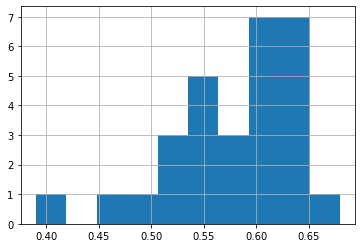

In [74]:
tst_best = tst_class[(tst_class['seq_length']==30)&
                    (tst_class['batch_size']==128)&
                    (tst_class['learning_rate']==0.0001)&
                    (tst_class['d_model']==512)&
                    (tst_class['n_layers']==1)&
                    (tst_class['n_heads']==8)&
                    (tst_class['d_ff']==512)&
                    (tst_class['dropout']==0.4)]

print('Tst best-classification')
#Hahaha den körde aldrig bästa kombon, så tog den som den konvergera till mest ggr
print_results(tst_best,['model'])
tst_best['val_accuracy'].hist()

In [75]:
# group the DataFrame by the chosen columns and count the number of rows in each group
tst_class = tst_class.groupby(['seq_length', 'batch_size', 'learning_rate', 'd_model', 'n_layers', 'n_heads', 'd_ff','dropout']).size().reset_index(name='count')
tst_class_grouped_sorted = tst_class.sort_values(by='count', ascending=False)
tst_class_grouped_sorted

,seq_length,batch_size,learning_rate,d_model,n_layers,n_heads,d_ff,dropout,count
41,30,128,0.0001,512,1,8,512,0.4,29
50,30,128,0.0100,512,1,8,512,0.4,3
49,30,128,0.0010,512,1,16,512,0.2,2
42,30,128,0.0001,512,1,8,512,0.6,2
44,30,128,0.0001,512,1,32,512,0.4,2
...,...,...,...,...,...,...,...,...,...
27,30,16,0.0001,128,4,16,256,0.6,1
28,30,16,0.0001,512,1,8,512,0.4,1
29,30,32,0.0001,128,4,16,256,0.6,1
30,30,32,0.0010,512,1,16,512,0.2,1
